In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import yfinance

import sys
sys.path.append("../quant_research_toolbox")
from strategies import *
from utils import *
from risk import *
from plots import *

In [3]:
df_aapl = load_ticker_data("AAPL", start_date="2015-01-01", end_date="2025-06-01")
df_aapl.head()

/home/onyxia/work/quant_research_toolbox/notebooks/../quant_research_toolbox/utils.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ticker = yf.download(ticker_name, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


,close,high,low,open,volume,ohlc_price,typical_price,median_price
Date,,,,,,,,
2015-01-02,24.288582,24.757336,23.848707,24.746228,212818400,24.410213,24.298209,24.303022
2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000,23.804273,23.719853,23.777614
2015-01-06,23.606558,23.866483,23.244438,23.668762,263188400,23.596560,23.572493,23.555461
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600,23.873701,23.893140,23.870924
2015-01-08,24.857304,24.915065,24.148618,24.266363,237458000,24.546837,24.640329,24.531842


-0.16717488222531962


<Axes: xlabel='Date'>

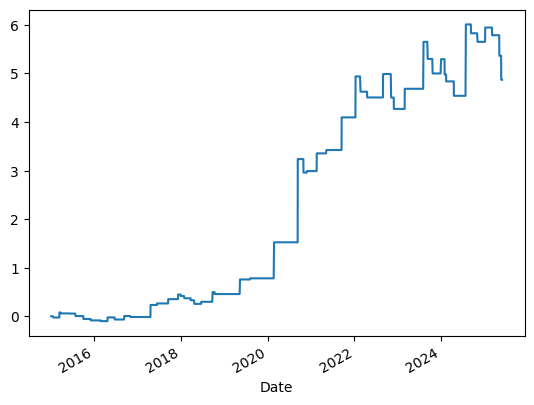

In [4]:
df_sc = Momentum.sma_crossover(df_aapl, "ohlc_price")
print(Drawdown.max_drawdown(df_sc["cumulative_returns"]))
df_sc["cumulative_returns"].plot()

In [5]:
tmp = Drawdown.daily_drawdown(df_sc["cumulative_returns"])
in_drawdown = tmp < 0
in_drawdown.head(20)

Date
2015-01-02    False
2015-01-05    False
2015-01-06    False
2015-01-07    False
2015-01-08    False
2015-01-09    False
2015-01-12    False
2015-01-13    False
2015-01-14    False
2015-01-15    False
2015-01-16    False
2015-01-20     True
2015-01-21     True
2015-01-22     True
2015-01-23     True
2015-01-26     True
2015-01-27     True
2015-01-28     True
2015-01-29     True
2015-01-30     True
Name: cumulative_returns, dtype: bool